In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("data.csv")
data.head()

<ipython-input-2-1de8def91d57>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("data.csv")


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1.487580e+18,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1.487580e+18,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1.784000e+18,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1.487580e+18,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1.487580e+18,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1048575 non-null  object 
 1   event_type     1048575 non-null  object 
 2   product_id     1048575 non-null  int64  
 3   category_id    1048575 non-null  float64
 4   category_code  16715 non-null    object 
 5   brand          602451 non-null   object 
 6   price          1048575 non-null  object 
 7   user_id        1048575 non-null  int64  
 8   user_session   1048357 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 72.0+ MB


In [4]:
data.shape

(1048575, 9)

הכנת טסט לבדיקת מהירה של הקודים

### Q1

In [5]:
data["event_time"] = pd.to_datetime(data["event_time"])
data = data.sort_values(by=["user_id", "user_session", "event_time"])
data["duration_to_next_event"] = data.groupby(["user_id", "user_session"])["event_time"].diff().dt.total_seconds().fillna(0)
data[["user_id","user_session","event_time","duration_to_next_event"]]
# ניתן היה להציג את כל הדאטה, הצגתי רק את העמודות שהוספתי ושרואים את השינוי

,user_id,user_session,event_time,duration_to_next_event
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,2019-11-04 15:28:57+00:00,0.0
697519,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:40:34+00:00,0.0
697645,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26+00:00,52.0
698043,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,124.0
698045,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,0.0
...,...,...,...,...
1048392,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,2019-11-08 11:16:28+00:00,0.0
1048385,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,2019-11-08 11:16:23+00:00,0.0
1048471,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,2019-11-08 11:16:55+00:00,0.0
1048462,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,2019-11-08 11:16:53+00:00,0.0


### Q2

In [6]:
data = data.sort_values(by=["user_id","event_time"])
data["days_diff"] = data.groupby(["user_id"])["event_time"].diff().dt.days
data["funnel_number"] = np.where(data["days_diff"].fillna(0)>5,1,0)
data["funnel_number"] = data.groupby("user_id")["funnel_number"].cumsum()+1
data.drop("days_diff",axis=1, inplace= True)
data[["user_id","user_session","event_time","funnel_number"]]
# ניתן היה להציג את כל הדאטה, הצגתי רק את העמודות שהוספתי  ושרואים את השינוי

,user_id,user_session,event_time,funnel_number
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,2019-11-04 15:28:57+00:00,1
697519,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:40:34+00:00,1
697645,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26+00:00,1
698043,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,1
698045,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,1
...,...,...,...,...
1048392,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,2019-11-08 11:16:28+00:00,1
1048385,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,2019-11-08 11:16:23+00:00,1
1048471,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,2019-11-08 11:16:55+00:00,1
1048462,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,2019-11-08 11:16:53+00:00,1


### Q3

In [7]:
data = data.sort_values(by=["user_id","user_session","event_time"])
data["shift_session"] = data["user_session"].shift()
data["session_same"] = np.where(data["shift_session"]==data["user_session"],0,1)
data["index_in_funnel"] = data.groupby(["user_id","funnel_number"])["session_same"].cumsum()
data[["user_id","user_session","event_time","event_type","funnel_number","index_in_funnel"]]
# ניתן היה להציג את כל הדאטה, הצגתי רק את העמודות שהוספתי ושרואים את השינוי

,user_id,user_session,event_time,event_type,funnel_number,index_in_funnel
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,2019-11-04 15:28:57+00:00,view,1,1
697519,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:40:34+00:00,cart,1,1
697645,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26+00:00,cart,1,1
698043,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,purchase,1,1
698045,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30+00:00,purchase,1,1
...,...,...,...,...,...,...
1048392,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,2019-11-08 11:16:28+00:00,view,1,1
1048385,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,2019-11-08 11:16:23+00:00,view,1,1
1048471,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,2019-11-08 11:16:55+00:00,view,1,1
1048462,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,2019-11-08 11:16:53+00:00,view,1,1


### Q4

In [8]:
# Define a regular expression pattern
pattern = '[0-9]+\.[0-9]+|[0-9]+'

# Apply the pattern to each element in the 'price' column
data["price"] = data["price"].apply(lambda x: re.findall(pattern, str(x)))
data["price"] = data["price"].apply(lambda x: float(x[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 437209 to 1048552
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   event_time              1048575 non-null  datetime64[ns, UTC]
 1   event_type              1048575 non-null  object             
 2   product_id              1048575 non-null  int64              
 3   category_id             1048575 non-null  float64            
 4   category_code           16715 non-null    object             
 5   brand                   602451 non-null   object             
 6   price                   1048575 non-null  float64            
 7   user_id                 1048575 non-null  int64              
 8   user_session            1048357 non-null  object             
 9   duration_to_next_event  1048575 non-null  float64            
 10  funnel_number           1048575 non-null  int32              
 11  shift_

### Q5

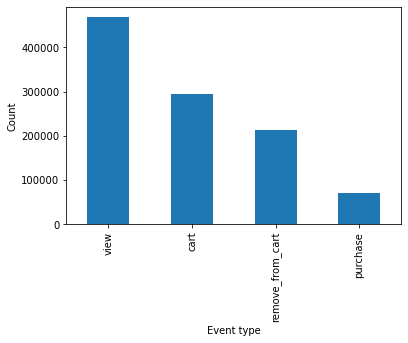

In [9]:
event_counts = data["event_type"].value_counts()

#Plot
fig, ax = plt.subplots()
event_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Event type")
ax.set_ylabel("Count")
plt.show()

### Q6

In [10]:
session_data = data.groupby(["user_session"]).agg({
    "user_id" : "first",
    "funnel_number" : "first",
    "index_in_funnel" : "first",
    "duration_to_next_event" : lambda x: list(x),
    "event_type" : lambda x: list(x),
    "product_id" :lambda x: list(x),
})

In [11]:
#e 
session_data["event_count"] = session_data["duration_to_next_event"].apply(len)
#f
session_data["event_sum"] = session_data["duration_to_next_event"].apply(sum)

#g
def viewed_products(row):
    lst = []
    for i in range(len(row["event_type"])):
        if row["event_type"][i] == "view":
            lst.append(row["product_id"][i])
    return lst

session_data["list_of_viewed"] = session_data.apply(viewed_products, axis=1)

#h
def cart_products(row):
    lst = []
    for i in range(len(row["event_type"])):
        if row["event_type"][i] == "cart":
            lst.append(row["product_id"][i])
    return lst

session_data["list_of_added_to_cart"] = session_data.apply(cart_products, axis=1)

#i
def purchase_products(row):
    lst = []
    for i in range(len(row["event_type"])):
        if row["event_type"][i] == "purchase":
            lst.append(row["product_id"][i])
    return lst

session_data["list_of_purchased"] = session_data.apply(purchase_products, axis=1)

session_data

,user_id,funnel_number,index_in_funnel,duration_to_next_event,event_type,product_id,event_count,event_sum,list_of_viewed,list_of_added_to_cart,list_of_purchased
user_session,,,,,,,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,[0.0],[view],[5829298],1,0.0,[5829298],[],[]
00005ac0-5c22-4756-bb12-31b90af75fa3,473600495,1,1,"[0.0, 11.0]","[view, view]","[5846437, 5846436]",2,11.0,"[5846437, 5846436]",[],[]
0000d358-49a1-4a54-b402-08205c35981c,557616099,1,1,[0.0],[view],[5887753],1,0.0,[5887753],[],[]
0000d72e-be5f-4a03-9f17-6ac81584f177,463202709,1,1,"[0.0, 71.0, 100.0, 1403.0, 11.0, 29.0, 6.0, 4....","[view, view, view, view, cart, view, view, vie...","[59996, 5739492, 5739493, 5739493, 5739493, 57...",12,2432.0,"[59996, 5739492, 5739493, 5739493, 5739493, 57...","[5739493, 5569528, 5813882]",[]
00013b79-0ac9-4944-bec6-1e787179717a,565510934,1,1,[0.0],[view],[5597836],1,0.0,[5597836],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
fffdd77b-e1cc-4d3f-8146-8c18c6ace8a1,390314700,1,17,"[0.0, 47.0, 43.0, 56.0, 60.0]","[view, cart, cart, cart, cart]","[5726163, 5726163, 5882390, 5761412, 5861126]",5,206.0,[5726163],"[5726163, 5882390, 5761412, 5861126]",[]
fffdeb50-083e-426b-8f94-52ca411aa3fc,457573869,1,1,"[0.0, 19.0, 23.0, 0.0]","[remove_from_cart, remove_from_cart, remove_fr...","[5760789, 5814830, 5789668, 5789668]",4,42.0,[],[],[]
ffff3540-3210-4069-8ed7-37d5fcea5b44,539592611,1,2,[0.0],[view],[5875644],1,0.0,[5875644],[],[]
